# Noisy Double Moon Experiment: pdist2 100. (Images)

In [1]:
import sys
sys.path.insert(1, '../../../_tools/')
import torch as th
import numpy as np
from twomoon_pretty import TwoMoon
from ml_tools.models.ffa import Fully_Connected_withEntropy
import matplotlib.pyplot as plt

exp_name = 'ffapdist2100'

seed = 42
th.manual_seed(seed)
np.random.seed(seed)
device = th.device('cuda' if th.cuda.is_available() else 'cpu')

### Data

In [2]:
Ndata = 1000
twomoon = TwoMoon(noise=0.16)
x, y = twomoon.sample(Ndata)
x, y = th.from_numpy(x).float().to(device), th.from_numpy(y).long().to(device)

### Load Model

In [3]:
M = th.load('../nsy2moon/' + exp_name + '.pt').to(device)

### Double Moon Plots

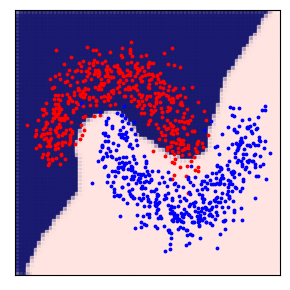

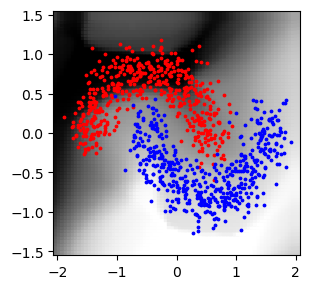

In [4]:
x_gr = twomoon.grid_sample()
x_gr_th = th.from_numpy(x_gr).float().to(device)

gather = [0, 1, 1]
M.gather.data = th.tensor(gather, device=device).float()

y_gr = M.predict(x_gr_th).cpu().numpy()
twomoon.plot(x_gr, y_gr)
#plt.title(f"gather={gather}  |  predict")
plt.savefig(exp_name + " - predict.pdf")

proba = M.sum_normalized_goodness(x_gr_th).cpu().numpy()
twomoon.plot_proba(x_gr, proba[:,1])
#plt.title(f"gather={gather}  |  sum-normalized goodness")
plt.savefig(exp_name + " - proba.pdf")
pass